**Parking dataset of USA**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
parking=pd.read_excel('parking.xls')

In [3]:
parking.head(5)

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [4]:
#Gives count along with the values
parking['Bldg Status'].value_counts()

ACTIVE            8981
EXCESS              70
DECOMMISSIONED       9
Name: Bldg Status, dtype: int64

In [5]:
parking['Property Type'].value_counts()

BUILDING     8602
STRUCTURE     339
LAND          119
Name: Property Type, dtype: int64

In [6]:
parking['Bldg City'].value_counts()

WASHINGTON      487
EL PASO          89
LAREDO           81
LAKEWOOD         79
SPRINGFIELD      79
               ... 
LIBERTY LAKE      1
GOSHEN            1
WEST MEMPHIS      1
HOQUIAM           1
KENNESAW          1
Name: Bldg City, Length: 1900, dtype: int64

In [7]:
parking['Bldg State'].value_counts()

TX    886
CA    746
DC    486
VA    440
FL    413
MD    403
NY    367
PA    245
CO    242
WA    242
IL    241
MI    235
AZ    222
GA    218
NC    212
MO    209
OH    201
IN    157
TN    152
MT    150
LA    149
NJ    146
KY    137
NM    136
OK    130
MA    127
AL    124
WI    122
WV    106
OR    105
MN     98
ME     97
UT     96
SC     95
MS     87
AR     83
ND     80
NV     75
VT     75
KS     74
IA     74
SD     66
ID     63
CT     58
NE     51
WY     45
NH     39
DE     28
RI     27
Name: Bldg State, dtype: int64

In [8]:
#display all columns
parking.columns

Index(['Bldg City', 'Bldg State', 'Bldg Status', 'Property Type',
       'Total Parking Spaces', 'Owned/Leased'],
      dtype='object')

In [9]:
#values for owned/leased
#aggfunc:aggreggate func.
owned_leased= pd.pivot_table (parking , index ='Owned/Leased', values='Total Parking Spaces', aggfunc= 'count')

In [10]:
owned_leased

,Total Parking Spaces
Owned/Leased,
LEASED,6940
OWNED,2120


<AxesSubplot:xlabel='Owned/Leased'>

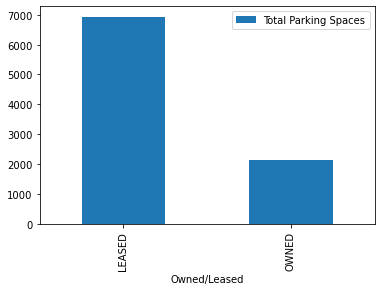

In [11]:
owned_leased.plot(kind= 'bar')#by default line

In [12]:
#in which building state parking situation is in excess-put it in a order
excess_parking= pd.pivot_table(parking, index="Bldg State", columns='Bldg Status', values='Total Parking Spaces')

In [13]:
excess_parking

Bldg Status,ACTIVE,DECOMMISSIONED,EXCESS
Bldg State,,,
AL,62.357724,NaN,59.000000
AR,37.000000,NaN,NaN
AZ,32.256757,NaN,NaN
CA,60.493298,NaN,NaN
CO,78.936709,NaN,22.200000
CT,29.327586,NaN,NaN
DC,41.255144,NaN,NaN
DE,15.750000,NaN,NaN
FL,51.905569,NaN,NaN


In [14]:
#removing null values from excess parking
excess_parking=excess_parking[excess_parking.EXCESS>0]
excess_parking

Bldg Status,ACTIVE,DECOMMISSIONED,EXCESS
Bldg State,,,
AL,62.357724,NaN,59.000000
CO,78.936709,NaN,22.200000
IL,45.000000,NaN,21.000000
LA,43.684932,NaN,68.666667
MD,104.185090,0.000000,43.166667
MO,121.200000,815.333333,254.272727
NE,54.060000,NaN,19.000000
NJ,32.169118,NaN,4.300000
NV,48.648649,NaN,173.000000


In [15]:
excess_park= excess_parking['EXCESS']

<AxesSubplot:xlabel='Bldg State'>

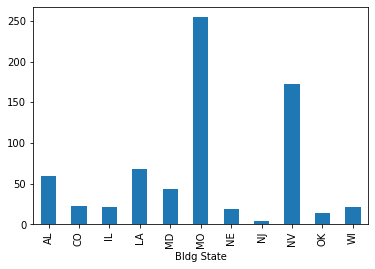

In [16]:
excess_park.plot(kind='bar')

In [17]:
#sorting excess parking
excess_sorted= excess_park.sort_values(ascending=False)

In [18]:
excess_sorted

Bldg State
MO    254.272727
NV    173.000000
LA     68.666667
AL     59.000000
MD     43.166667
CO     22.200000
WI     22.000000
IL     21.000000
NE     19.000000
OK     14.000000
NJ      4.300000
Name: EXCESS, dtype: float64

<BarContainer object of 11 artists>

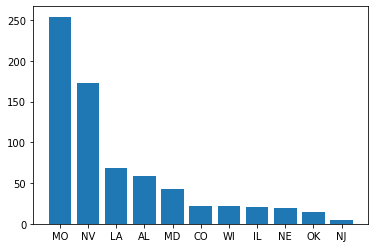

In [19]:
plt.bar(excess_sorted.index,excess_sorted.values)

In [20]:
#Building cities that have been decommissioned along with total parking
decom_property= parking[parking['Bldg Status']== 'DECOMMISSIONED']

In [21]:
decom_property

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
429,PORTHILL,ID,DECOMMISSIONED,BUILDING,0,OWNED
1933,MOOERS,NY,DECOMMISSIONED,BUILDING,0,OWNED
1934,MOOERS,NY,DECOMMISSIONED,BUILDING,0,OWNED
2338,CURTIS BAY,MD,DECOMMISSIONED,BUILDING,0,OWNED
2348,CURTIS BAY,MD,DECOMMISSIONED,BUILDING,0,OWNED
5716,OVERLAND,MO,DECOMMISSIONED,BUILDING,2089,OWNED
5725,SAINT LOUIS,MO,DECOMMISSIONED,BUILDING,357,OWNED
5726,SAINT LOUIS,MO,DECOMMISSIONED,BUILDING,0,OWNED
6752,FORT WORTH,TX,DECOMMISSIONED,BUILDING,0,OWNED


In [22]:
decom_pro= decom_property[decom_property['Total Parking Spaces'] > 0]

In [23]:
decom_pro

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
5716,OVERLAND,MO,DECOMMISSIONED,BUILDING,2089,OWNED
5725,SAINT LOUIS,MO,DECOMMISSIONED,BUILDING,357,OWNED


In [24]:
#in which type of property parking space is in excess
excess_parking_property=pd.pivot_table( parking[parking['Bldg Status'] == 'EXCESS'], index='Property Type' , values= 'Total Parking Spaces')

In [25]:
excess_parking_property

,Total Parking Spaces
Property Type,
BUILDING,57.791045
STRUCTURE,37.000000


<AxesSubplot:xlabel='Property Type'>

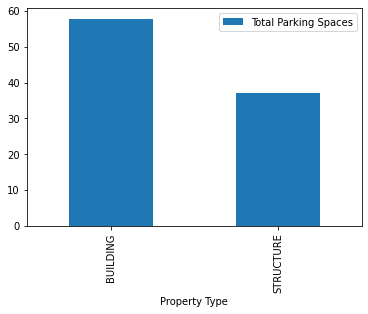

In [26]:
excess_parking_property.plot(kind='bar')

In [27]:
active_parking=pd.pivot_table( parking[parking['Bldg Status'] == 'ACTIVE'], index='Owned/Leased' , values= 'Total Parking Spaces')

In [28]:
active_parking

,Total Parking Spaces
Owned/Leased,
LEASED,44.707349
OWNED,74.365997


In [29]:
leased_parking_states= pd.pivot_table( parking[parking['Owned/Leased'] == 'LEASED'], index='Bldg State' , values= 'Total Parking Spaces')

In [30]:
leased_parking_states.sort_values('Total Parking Spaces' , ascending=False)

,Total Parking Spaces
Bldg State,
MO,107.762821
TX,73.457086
VA,72.476316
AL,64.055556
UT,62.505882
GA,62.425414
CO,58.647727
VT,56.128205
NM,51.926316


In [31]:
active_pro_parking=pd.pivot_table( parking[parking['Bldg Status'] == 'ACTIVE'], index='Property Type' , values= 'Total Parking Spaces')

In [32]:
active_pro_parking

,Total Parking Spaces
Property Type,
BUILDING,51.134764
LAND,19.268908
STRUCTURE,70.779762


In [33]:
parking_zero= parking[parking['Total Parking Spaces']== 0]

In [34]:
parking_zero.sort_values('Bldg State')

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
3083,HUNTSVILLE,AL,ACTIVE,BUILDING,0,LEASED
3177,MOBILE,AL,ACTIVE,BUILDING,0,LEASED
3174,BIRMINGHAM,AL,ACTIVE,BUILDING,0,LEASED
3162,MADISON,AL,ACTIVE,BUILDING,0,LEASED
3161,HUNTSVILLE,AL,ACTIVE,BUILDING,0,LEASED
...,...,...,...,...,...,...
7976,CHEYENNE,WY,ACTIVE,STRUCTURE,0,OWNED
8008,CODY,WY,ACTIVE,BUILDING,0,LEASED
8016,CASPER,WY,ACTIVE,STRUCTURE,0,LEASED
8005,CASPER,WY,ACTIVE,BUILDING,0,LEASED


In [35]:
c= parking_zero[['Bldg State','Total Parking Spaces']]

In [36]:
c

,Bldg State,Total Parking Spaces
1,CT,0
3,CT,0
11,CT,0
31,CT,0
35,CT,0
...,...,...
9013,NV,0
9015,NV,0
9029,NV,0
9042,NV,0


In [37]:
parking_spaces= pd.pivot_table(parking, index= 'Bldg State' , values= 'Total Parking Spaces')

In [38]:
parking_spaces

,Total Parking Spaces
Bldg State,
AL,62.330645
AR,37.000000
AZ,32.256757
CA,60.493298
CO,77.764463
CT,29.327586
DC,41.255144
DE,15.750000
FL,51.905569
